In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer = pd.read_csv('../data/customer.csv')

In [3]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loyalty#                 16921 non-null  int64  
 1   Province or State        16921 non-null  object 
 2   City                     16921 non-null  object 
 3   Latitude                 16921 non-null  float64
 4   Longitude                16921 non-null  float64
 5   Postal code              16921 non-null  object 
 6   Gender                   16921 non-null  object 
 7   Education                16921 non-null  object 
 8   Location Code            16921 non-null  object 
 9   Income                   16901 non-null  float64
 10  Marital Status           16921 non-null  object 
 11  LoyaltyStatus            16921 non-null  object 
 12  CancellationDate         2310 non-null   object 
 13  Customer Lifetime Value  16901 non-null  float64
 14  EnrollmentType        

## Univariante analysis

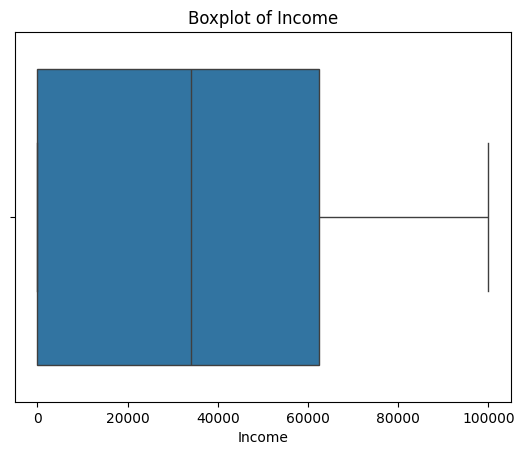

In [5]:
sns.boxplot(x='Income', data=customer)
plt.title('Boxplot of Income')
plt.show()

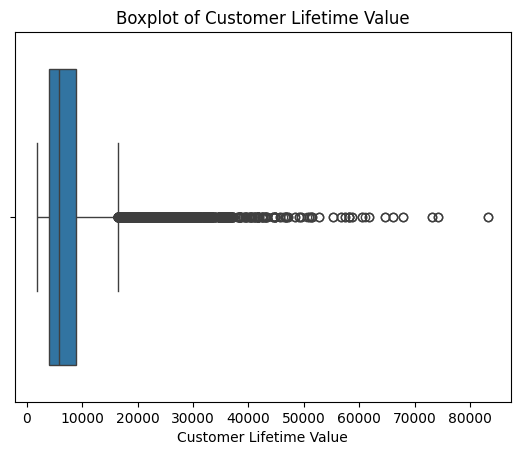

In [7]:
sns.boxplot(x=customer['Customer Lifetime Value'])
plt.title('Boxplot of Customer Lifetime Value')
plt.show()

- A lot of outliers are present in Customer Lifetime Value features.                        

In [10]:
customer['month'].value_counts()

month
5     1520
12    1496
7     1489
10    1458
11    1455
8     1444
6     1422
4     1410
9     1407
3     1375
2     1234
1     1211
Name: count, dtype: int64

# Bivariante Analysis

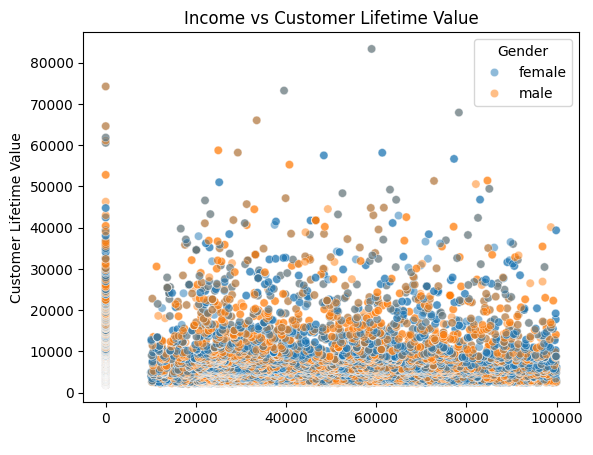

In [14]:
sns.scatterplot(x='Income', y='Customer Lifetime Value', data=customer, alpha=0.5, hue='Gender')
plt.title('Income vs Customer Lifetime Value')
plt.show()

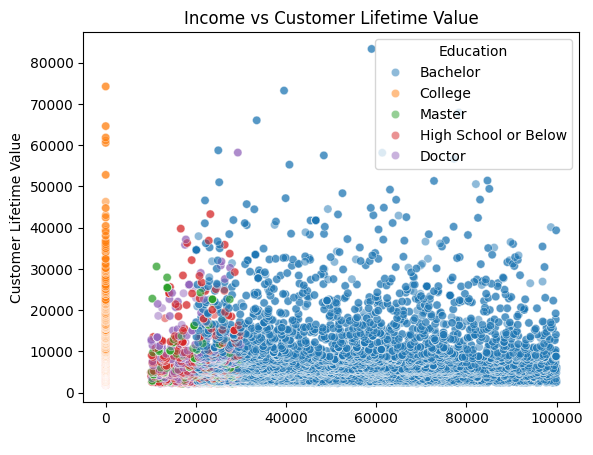

In [15]:
sns.scatterplot(x='Income', y='Customer Lifetime Value', data=customer, alpha=0.5, hue='Education')
plt.title('Income vs Customer Lifetime Value')
plt.show()

- The customers that have income 0 are mostly college graduates.

In [20]:
customer['LoyaltyStatus'].value_counts()

LoyaltyStatus
Star      7761
Nova      5722
Aurora    3438
Name: count, dtype: int64

- Most of them have Star LoyaltyStatus.
- The second most common is Aurora LoyaltyStatus.

## Multivariante Analysis

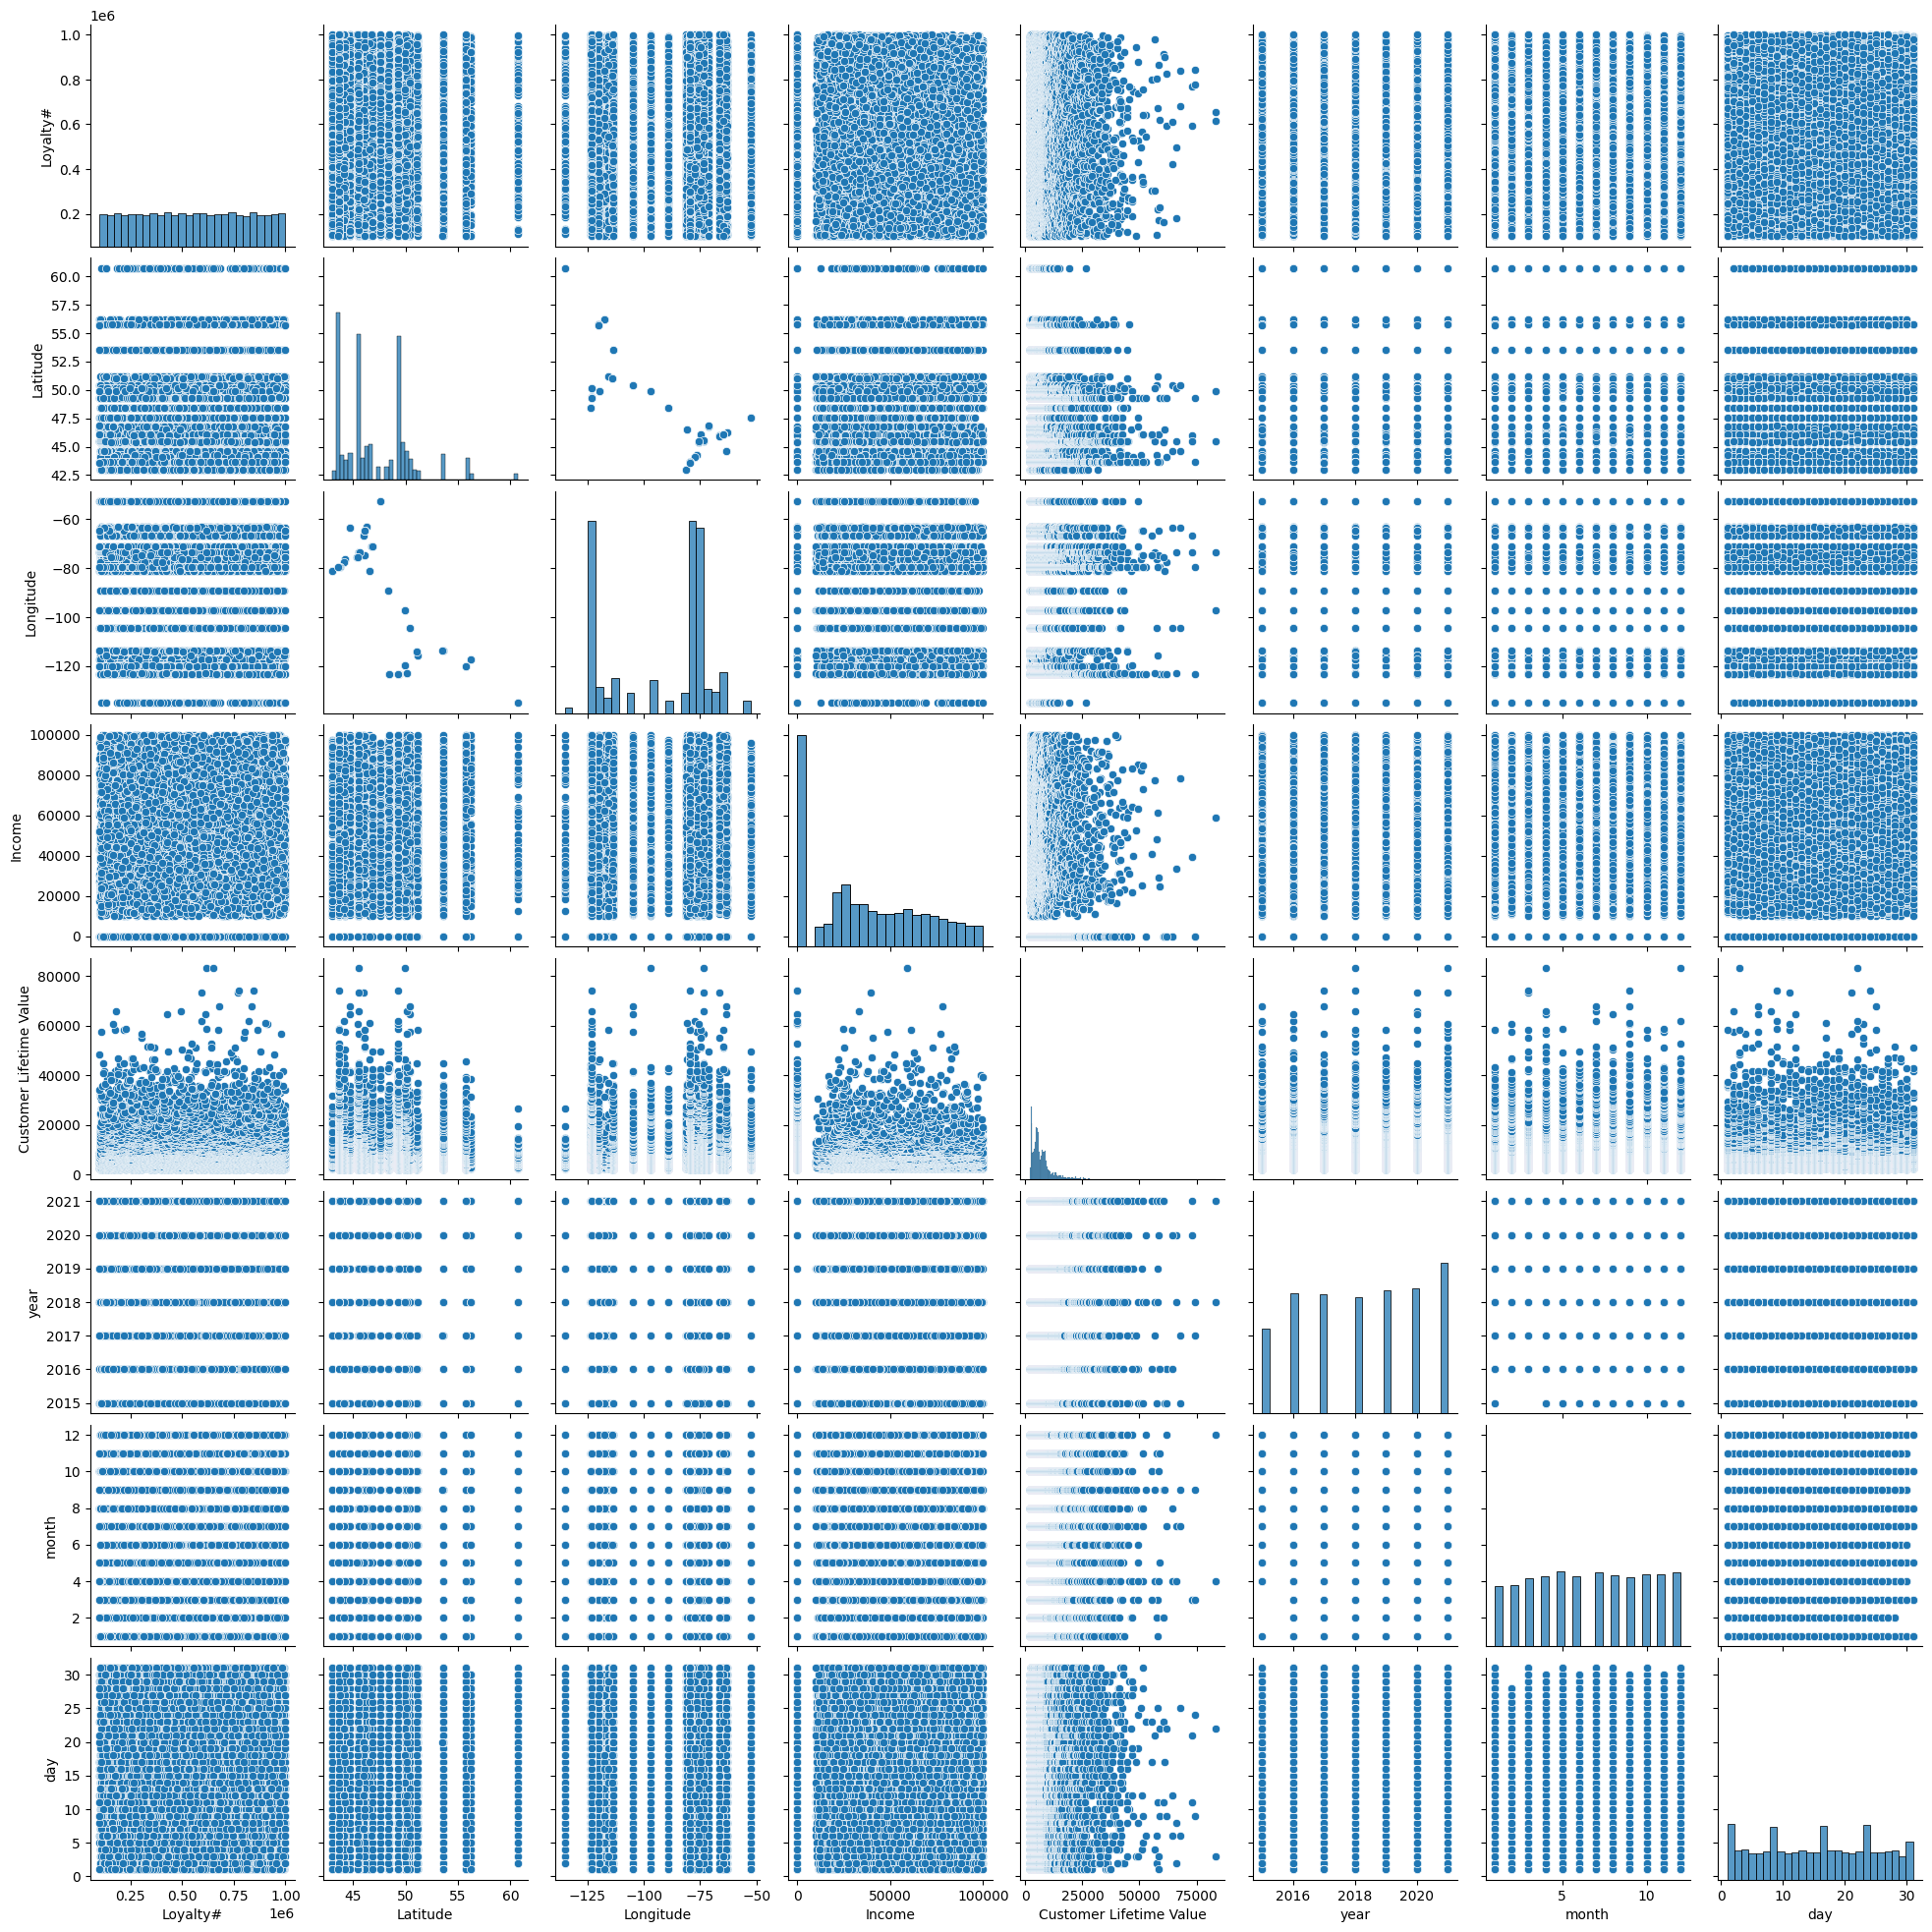

In [22]:
sns.pairplot(customer)
plt.show()

In [26]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loyalty#                 16921 non-null  int64  
 1   Province or State        16921 non-null  object 
 2   City                     16921 non-null  object 
 3   Latitude                 16921 non-null  float64
 4   Longitude                16921 non-null  float64
 5   Postal code              16921 non-null  object 
 6   Gender                   16921 non-null  object 
 7   Education                16921 non-null  object 
 8   Location Code            16921 non-null  object 
 9   Income                   16901 non-null  float64
 10  Marital Status           16921 non-null  object 
 11  LoyaltyStatus            16921 non-null  object 
 12  CancellationDate         2310 non-null   object 
 13  Customer Lifetime Value  16901 non-null  float64
 14  EnrollmentType        

In [27]:
pd.crosstab(customer['Education'], customer['Income'] == 0)


Income,False,True
Education,,
Bachelor,10586,0
College,10,4273
Doctor,742,0
High School or Below,792,0
Master,518,0


- There is a pattern that the college students are the one that are not revealing their income or they might actually have zero income.

In [29]:
ct = pd.crosstab(customer['Education'], customer['Gender'], normalize='index')

<Axes: xlabel='Education'>

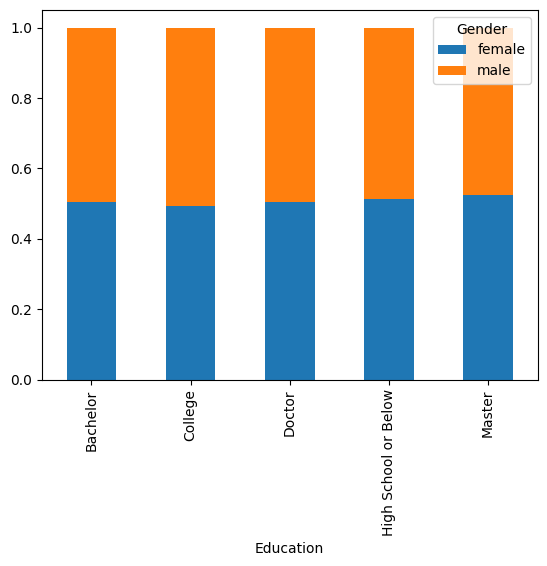

In [30]:
ct.plot(kind='bar', stacked=True)

- In each Education level the proportion of male and feamle customers is almost same.

<Axes: xlabel='EnrollmentType'>

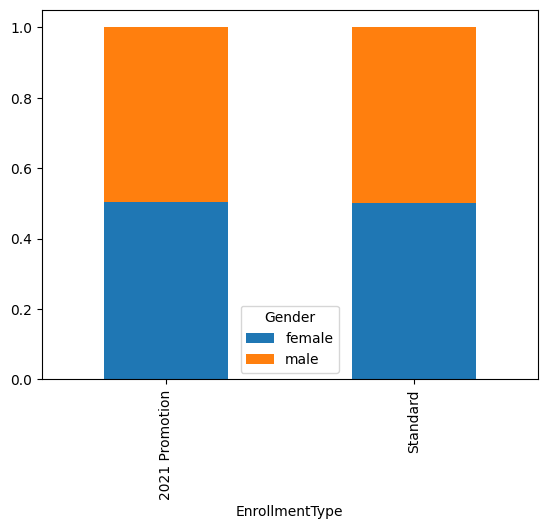

In [35]:
ct = pd.crosstab(customer['EnrollmentType'], customer['Gender'], normalize='index')
ct.plot(kind='bar', stacked=True)

<Axes: xlabel='Location Code'>

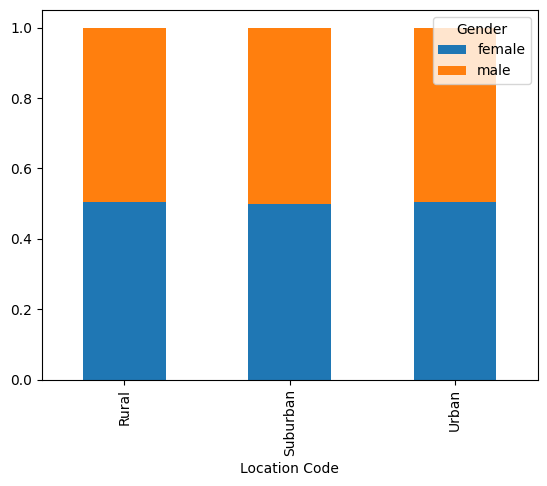

In [37]:
ct = pd.crosstab(customer['Location Code'], customer['Gender'], normalize='index')
ct.plot(kind='bar', stacked=True)

<Axes: xlabel='EnrollmentType'>

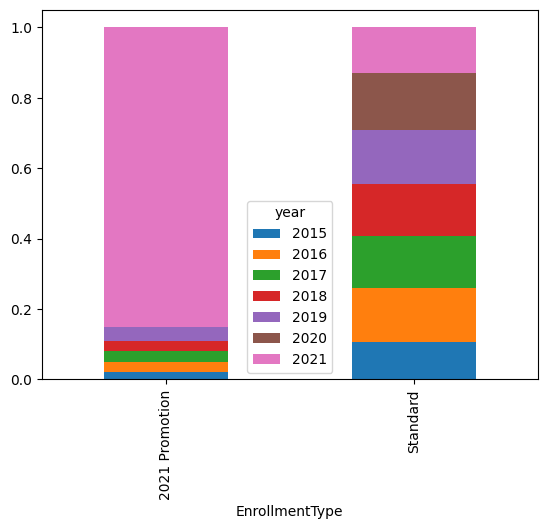

In [38]:
ct = pd.crosstab(customer['EnrollmentType'], customer['year'], normalize='index')
ct.plot(kind='bar', stacked=True)

In [41]:
customer['CancellationDate'] = pd.to_datetime(customer['CancellationDate'], errors='coerce')
customer['cancel_year'] = customer['CancellationDate'].dt.year

<Axes: xlabel='EnrollmentType'>

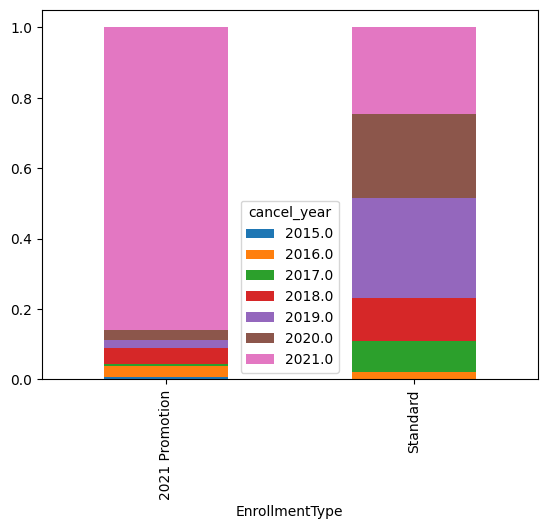

In [42]:
ct = pd.crosstab(customer['EnrollmentType'], customer['cancel_year'], normalize='index')
ct.plot(kind='bar', stacked=True)

- For the 2021 Promotion, the cancel year was 2021 which is the highest among all.
- But of the Standard Enrollment Type, the cancel year was 2019 which is the highest among all.

<Axes: xlabel='LoyaltyStatus'>

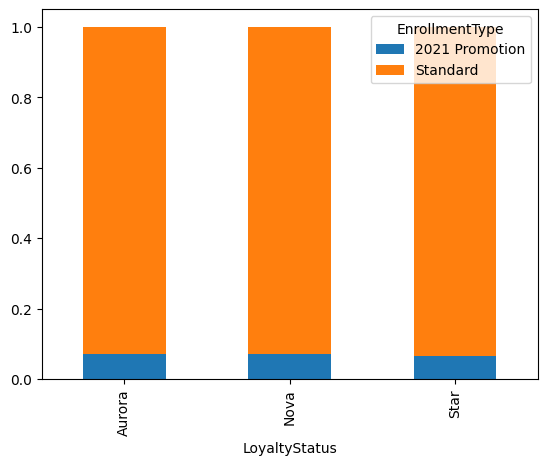

In [46]:
ct = pd.crosstab(customer['LoyaltyStatus'], customer['EnrollmentType'], normalize='index')
ct.plot(kind='bar', stacked=True)

In [47]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Loyalty#                 16921 non-null  int64         
 1   Province or State        16921 non-null  object        
 2   City                     16921 non-null  object        
 3   Latitude                 16921 non-null  float64       
 4   Longitude                16921 non-null  float64       
 5   Postal code              16921 non-null  object        
 6   Gender                   16921 non-null  object        
 7   Education                16921 non-null  object        
 8   Location Code            16921 non-null  object        
 9   Income                   16901 non-null  float64       
 10  Marital Status           16921 non-null  object        
 11  LoyaltyStatus            16921 non-null  object        
 12  CancellationDate         2308 no

In [48]:
customer['cancel_month'] = customer['CancellationDate'].dt.month

## Enrollement Type Analysis

In [ ]:
customer['EnrollmentType'].value_counts()

EnrollmentType
Standard          15773
2021 Promotion     1148
Name: count, dtype: int64

In [78]:
customer['EnrollmentType'].value_counts(normalize=True)


EnrollmentType
Standard          0.932155
2021 Promotion    0.067845
Name: proportion, dtype: float64

Only ~7% of customers joined via the 2021 Promotion, making it a targeted but potentially risky acquisition strategy

<Axes: xlabel='EnrollmentType'>

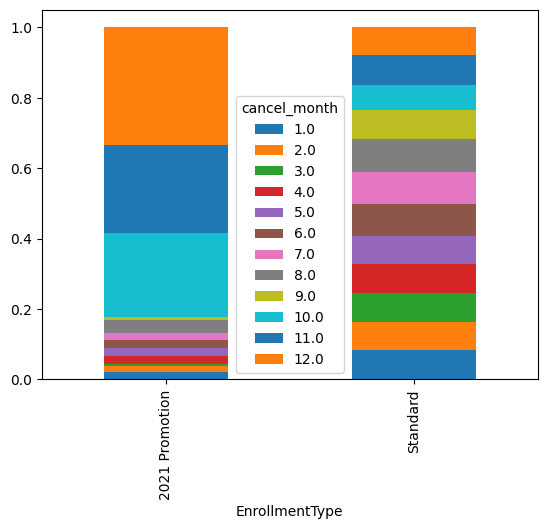

In [49]:
ct = pd.crosstab(customer['EnrollmentType'], customer['cancel_month'], normalize='index')
ct.plot(kind='bar', stacked=True)

In [60]:
ct = pd.crosstab(customer['EnrollmentType'], customer['month'])
ct

month,1,2,3,4,5,6,7,8,9,10,11,12
EnrollmentType,,,,,,,,,,,,
2021 Promotion,13,301,345,358,14,15,17,19,11,22,13,20
Standard,1198,933,1030,1052,1506,1407,1472,1425,1396,1436,1442,1476


In [61]:
ct = pd.crosstab(customer['EnrollmentType'], customer['cancel_month'])

ct

cancel_month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
EnrollmentType,,,,,,,,,,,,
2021 Promotion,3,2,1,3,3,3,3,5,1,32,34,45
Standard,184,168,179,179,177,198,193,206,179,153,186,171


Promotion customers disproportionately cancel toward the end of the year, suggesting short-term engagement

In [62]:
pd.crosstab(customer['EnrollmentType'], customer['year'])

year,2015,2016,2017,2018,2019,2020,2021
EnrollmentType,,,,,,,
2021 Promotion,23,34,36,34,45,0,976
Standard,1691,2386,2371,2317,2432,2519,2057


In [70]:
cohort_churn = (
    customer
    .groupby(['year', 'EnrollmentType'])['cancel_year']
    .apply(lambda x: x.notna().mean())
    .round(3)
)

cohort_churn


year  EnrollmentType
2015  2021 Promotion    0.000
      Standard          0.001
2016  2021 Promotion    0.000
      Standard          0.154
2017  2021 Promotion    0.000
      Standard          0.167
2018  2021 Promotion    0.000
      Standard          0.176
2019  2021 Promotion    0.000
      Standard          0.164
2020  Standard          0.149
2021  2021 Promotion    0.138
      Standard          0.110
Name: cancel_year, dtype: float64

- Churn rate is high for 2021 Promotuon as compared to the Standard enrollment type.

In [79]:
customer.groupby('EnrollmentType')['cancel_year'].apply(lambda x: x.notna().mean())


EnrollmentType
2021 Promotion    0.117596
Standard          0.137767
Name: cancel_year, dtype: float64

<Axes: xlabel='EnrollmentType'>

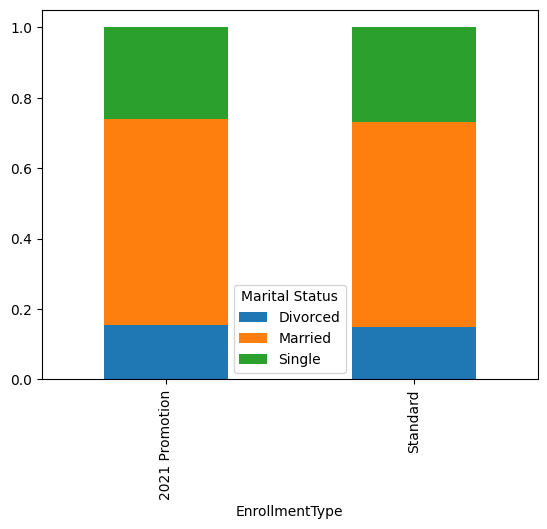

In [73]:
ct = pd.crosstab(customer['EnrollmentType'], customer['Marital Status'], normalize='index')
ct.plot(kind='bar', stacked=True)

<Axes: xlabel='EnrollmentType', ylabel='Customer Lifetime Value'>

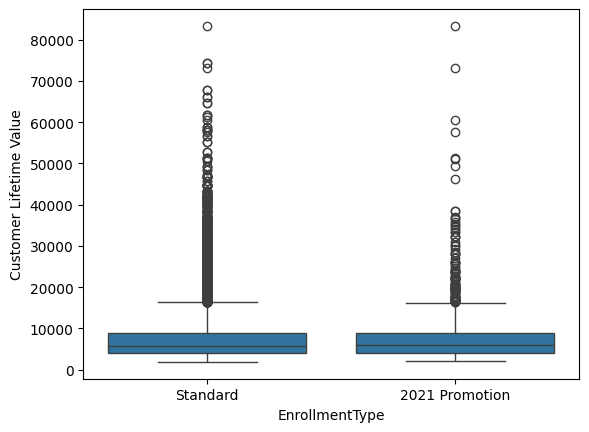

In [75]:
sns.boxplot(
    x='EnrollmentType',
    y='Customer Lifetime Value',
    data=customer
)


In [76]:
customer.groupby('EnrollmentType')['Income'].median()


EnrollmentType
2021 Promotion    35011.5
Standard          34115.0
Name: Income, dtype: float64

In [77]:
pd.crosstab(
    customer['EnrollmentType'],
    customer['LoyaltyStatus'],
    normalize='index'
)


LoyaltyStatus,Aurora,Nova,Star
EnrollmentType,,,
2021 Promotion,0.210801,0.348432,0.440767
Standard,0.202625,0.337412,0.459963


Promotion drives short-term growth, not long-term retention

Promotion customers:
- Churn more
- Churn faster
- Have lower CLV
- Achieve lower loyalty tiers

Standard enrollment is more stable and profitable

## Cancelation Analysis 

In [80]:
customer['cancel_year'].value_counts()

cancel_year
2021.0    650
2019.0    620
2020.0    522
2018.0    275
2017.0    189
2016.0     49
2015.0      3
Name: count, dtype: int64

In [81]:
customer['cancel_month'].value_counts()

cancel_month
11.0    220
12.0    216
8.0     211
6.0     201
7.0     196
1.0     187
10.0    185
4.0     182
3.0     180
5.0     180
9.0     180
2.0     170
Name: count, dtype: int64

- At the end of year, most of the customers cancelled their subscription.

In [83]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Loyalty#                 16921 non-null  int64         
 1   Province or State        16921 non-null  object        
 2   City                     16921 non-null  object        
 3   Latitude                 16921 non-null  float64       
 4   Longitude                16921 non-null  float64       
 5   Postal code              16921 non-null  object        
 6   Gender                   16921 non-null  object        
 7   Education                16921 non-null  object        
 8   Location Code            16921 non-null  object        
 9   Income                   16901 non-null  float64       
 10  Marital Status           16921 non-null  object        
 11  LoyaltyStatus            16921 non-null  object        
 12  CancellationDate         2308 no

---

## Flights DB

In [84]:
flight = pd.read_csv('../data/flights.csv')

In [85]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608436 entries, 0 to 608435
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  608436 non-null  int64  
 1   Year                      608436 non-null  int64  
 2   Month                     608436 non-null  int64  
 3   NumFlights                608436 non-null  float64
 4   NumFlightsWithCompanions  608436 non-null  float64
 5   DistanceKM                608436 non-null  float64
 6   PointsAccumulated         608436 non-null  float64
 7   PointsRedeemed            608436 non-null  float64
 8   DollarCostPointsRedeemed  608436 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 41.8 MB


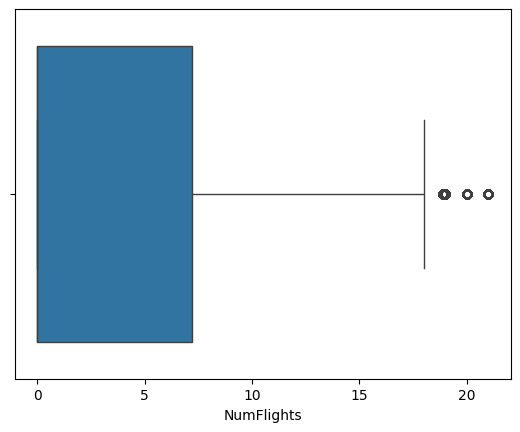

In [87]:
sns.boxplot(x='NumFlights', data=flight)
plt.show()

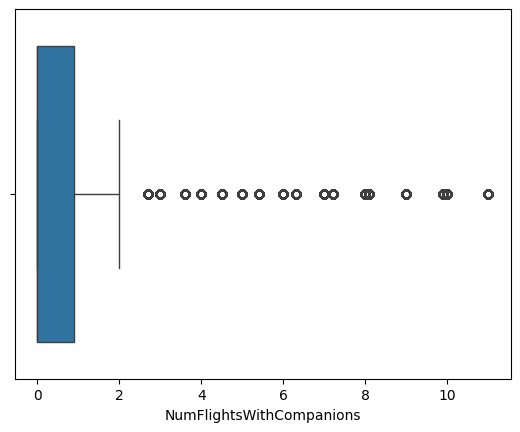

In [88]:
sns.boxplot(x='NumFlightsWithCompanions', data=flight)
plt.show()

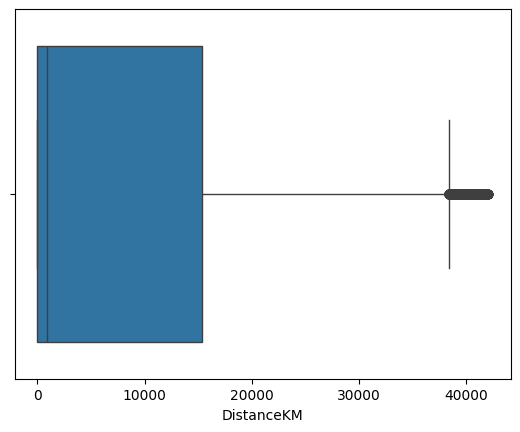

In [89]:
sns.boxplot(x='DistanceKM', data=flight)
plt.show()

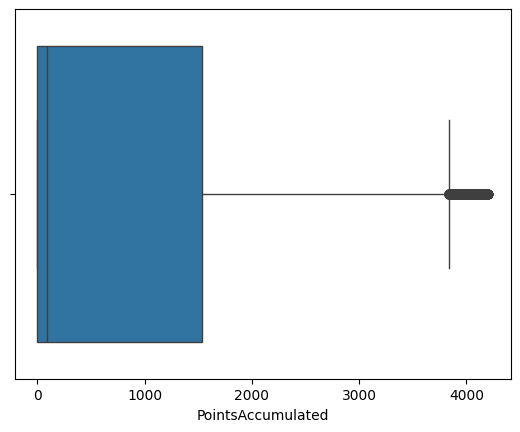

In [90]:
sns.boxplot(x='PointsAccumulated', data=flight)
plt.show()

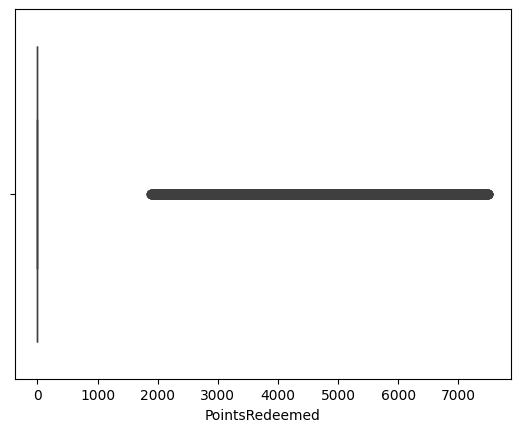

In [91]:
sns.boxplot(x='PointsRedeemed', data=flight)
plt.show()

- We can see that people dont redeem the points usually.

In [92]:
flight['Loyalty#'].nunique()

16737

In [93]:
customer['Loyalty#'].nunique()

16757

- So the flights have 16737 unique customers, while the customers have 16757 unique customers which means we can merge the two datasets

In [ ]:
flights

Loyalty#
100018    1472.619444
100102     941.776667
100140    1199.793889
100214    1012.604722
100272    1193.145833
             ...     
999902    1694.626389
999911       0.000000
999940     662.655278
999982     146.222222
999986     958.526667
Name: PointsAccumulated, Length: 16737, dtype: float64

In [97]:
#create new dataframe with the aggregated data

flights_agg = flight.groupby('Loyalty#').agg({
    'NumFlights': 'sum',
    'NumFlightsWithCompanions': 'sum',
    'DistanceKM': 'sum',
    'PointsAccumulated': 'sum',
    'PointsRedeemed': 'sum'
})

flights_agg.head()

,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed
Loyalty#,,,,,
100018,229.9,49.4,530230.0,53014.30,20562.8
100102,247.7,58.2,339114.6,33903.96,18760.6
100140,216.8,54.2,432030.8,43192.58,4896.0
100214,112.3,19.7,364601.7,36453.77,12908.6
100272,186.4,53.1,429630.5,42953.25,10891.4


In [99]:
flights_agg.shape

(16737, 5)

In [100]:
merge = customer.merge(flights_agg, how='left', on='Loyalty#')
merge.head()

,Loyalty#,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,...,month,day,cancel_year,cancel_month,tenure,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed
0,480934,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,70146.0,...,2,15,NaN,NaN,NaN,189.6,56.1,507054.9,50699.39,13517.9
1,549612,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,0.0,...,3,9,NaN,NaN,NaN,279.1,32.2,426827.4,42672.54,22457.8
2,429460,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,0.0,...,7,14,2021.0,1.0,4.0,120.0,39.9,238376.1,23832.41,5479.6
3,608370,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,0.0,...,2,17,NaN,NaN,NaN,195.9,58.5,386029.3,38595.63,16331.5
4,530508,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,97832.0,...,10,25,NaN,NaN,NaN,170.7,62.9,369242.6,36916.56,0.0


In [101]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Loyalty#                  16921 non-null  int64         
 1   Province or State         16921 non-null  object        
 2   City                      16921 non-null  object        
 3   Latitude                  16921 non-null  float64       
 4   Longitude                 16921 non-null  float64       
 5   Postal code               16921 non-null  object        
 6   Gender                    16921 non-null  object        
 7   Education                 16921 non-null  object        
 8   Location Code             16921 non-null  object        
 9   Income                    16901 non-null  float64       
 10  Marital Status            16921 non-null  object        
 11  LoyaltyStatus             16921 non-null  object        
 12  CancellationDate  

In [102]:
merge.isna().sum()

Loyalty#                        0
Province or State               0
City                            0
Latitude                        0
Longitude                       0
Postal code                     0
Gender                          0
Education                       0
Location Code                   0
Income                         20
Marital Status                  0
LoyaltyStatus                   0
CancellationDate            14613
Customer Lifetime Value        20
EnrollmentType                  0
FullName                        0
year                            0
month                           0
day                             0
cancel_year                 14613
cancel_month                14613
tenure                      14613
NumFlights                     20
NumFlightsWithCompanions       20
DistanceKM                     20
PointsAccumulated              20
PointsRedeemed                 20
dtype: int64

In [103]:
merge = merge.dropna(subset=['Income'])

In [104]:
merge.isna().sum()

Loyalty#                        0
Province or State               0
City                            0
Latitude                        0
Longitude                       0
Postal code                     0
Gender                          0
Education                       0
Location Code                   0
Income                          0
Marital Status                  0
LoyaltyStatus                   0
CancellationDate            14613
Customer Lifetime Value         0
EnrollmentType                  0
FullName                        0
year                            0
month                           0
day                             0
cancel_year                 14613
cancel_month                14613
tenure                      14613
NumFlights                      0
NumFlightsWithCompanions        0
DistanceKM                      0
PointsAccumulated               0
PointsRedeemed                  0
dtype: int64

In [105]:
merge.shape

(16901, 27)

- Here we have a total of 16901 rows and 27 columns

- We can remove the columns that are of no use

In [106]:
merge = merge.drop(columns = ['Loyalty#', 'FullName', 'City', 'Postal code', 'Longitude', 'Latitude', 'Province or State'])

In [119]:
merge = merge.drop(columns=['Location Code', 'CancellationDate'])

In [107]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16901 entries, 0 to 16900
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Gender                    16901 non-null  object        
 1   Education                 16901 non-null  object        
 2   Location Code             16901 non-null  object        
 3   Income                    16901 non-null  float64       
 4   Marital Status            16901 non-null  object        
 5   LoyaltyStatus             16901 non-null  object        
 6   CancellationDate          2288 non-null   datetime64[ns]
 7   Customer Lifetime Value   16901 non-null  float64       
 8   EnrollmentType            16901 non-null  object        
 9   year                      16901 non-null  int64         
 10  month                     16901 non-null  int64         
 11  day                       16901 non-null  int64         
 12  cancel_year            

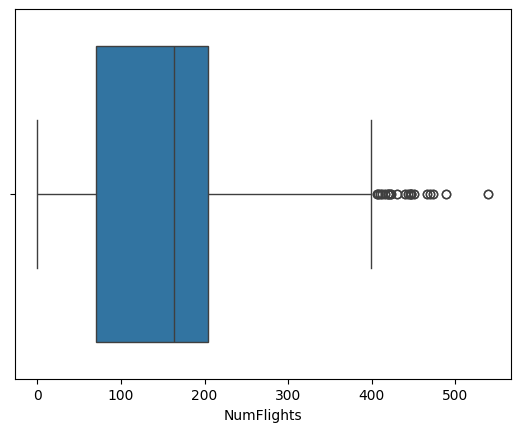

In [112]:
sns.boxplot(x='NumFlights', data=merge)
plt.show()

In [ ]:
- Some outliers are present as well

# Analysis of the Customer with number of flights = 0

In [121]:
flights_zero = merge[merge['NumFlights'] == 0]

In [122]:
flights_zero.shape

(1529, 18)

In [123]:
flights_zero.shape[0] / merge.shape[0] * 100

9.046801964380807

- Around 9.04% of the customers has 0 flights in total which means they dont fly at all and are just enrolled in the program

In [124]:
flights_zero.describe()

,Income,Customer Lifetime Value,year,month,day,cancel_year,cancel_month,tenure,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed
count,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,970.000000,970.000000,970.000000,1529.0,1529.0,1529.000000,1529.000000,1529.0
mean,38117.211249,8365.946678,2017.806409,7.275997,15.443427,2018.219588,7.044330,0.801031,0.0,0.0,23.169392,2.315239,0.0
std,29744.472705,7535.494886,2.043489,3.705939,8.895825,0.959569,3.426524,1.024266,0.0,0.0,605.510003,60.524875,0.0
min,0.000000,1994.770000,2015.000000,1.000000,1.000000,2015.000000,1.000000,-6.000000,0.0,0.0,0.000000,0.000000,0.0
25%,13663.000000,4171.190000,2016.000000,4.000000,8.000000,2018.000000,4.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
50%,33681.000000,5912.780000,2018.000000,7.000000,15.000000,2018.000000,7.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0
75%,61953.000000,9079.820000,2019.000000,11.000000,23.000000,2019.000000,10.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0
max,99981.000000,83325.380000,2021.000000,12.000000,31.000000,2021.000000,12.000000,4.000000,0.0,0.0,20586.000000,2058.000000,0.0


- Among 1529 customers that have never flown, about 970 has cancelled their membership

In [126]:
970/1529 * 100

63.440156965336826

- About 63.44% of the customers that has number of flights =0 has cancelled their account/membership. 

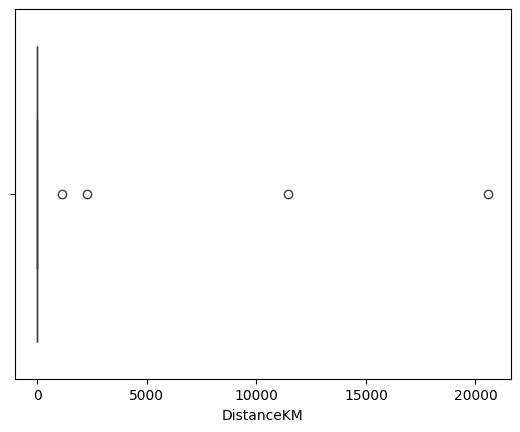

In [127]:
sns.boxplot(x='DistanceKM', data=flights_zero)
plt.show()

In [128]:
flights_zero[flights_zero['DistanceKM'] != 0]

,Gender,Education,Income,Marital Status,LoyaltyStatus,Customer Lifetime Value,EnrollmentType,year,month,day,cancel_year,cancel_month,tenure,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed
2438,male,Bachelor,30595.0,Married,Aurora,8114.41,Standard,2021,7,3,NaN,NaN,NaN,0.0,0.0,2263.0,226.0,0.0
2851,female,Bachelor,37722.0,Single,Aurora,9075.77,Standard,2021,11,24,NaN,NaN,NaN,0.0,0.0,11439.0,1143.0,0.0
5890,male,Bachelor,36349.0,Married,Nova,4479.60,Standard,2021,10,16,NaN,NaN,NaN,0.0,0.0,1138.0,113.0,0.0
6864,female,Doctor,20392.0,Married,Nova,5608.17,Standard,2021,11,24,NaN,NaN,NaN,0.0,0.0,20586.0,2058.0,0.0


Only 4 of them have distance in KM not 0, and they have also accumulated the points as well.

<Axes: xlabel='Customer Lifetime Value'>

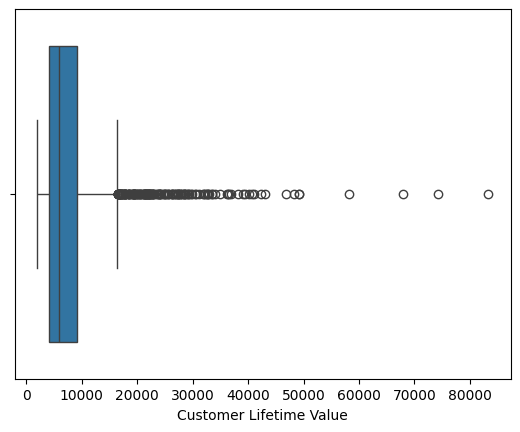

In [129]:
sns.boxplot(x='Customer Lifetime Value', data=flights_zero)

## Customer that has high lifetime value but has no flights in the recent 3 years data

In [134]:
high_val_zero_flight = flights_zero[flights_zero['Customer Lifetime Value'] > 20000]

In [135]:
high_val_zero_flight.shape

(112, 18)

- We can see the customers that have Customer Lifetime Value > 20000 are also in the group of the customers that have NumFlights == 0 in the past 3 years time period

In [136]:
high_val_zero_flight.shape[0] / flights_zero.shape[0] * 100

7.325049051667756

About 7% of the data has a customer lifetime value greater than 20000

In [137]:
high_val_zero_flight.describe()

,Income,Customer Lifetime Value,year,month,day,cancel_year,cancel_month,tenure,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed
count,112.000000,112.000000,112.000000,112.000000,112.000000,78.000000,78.000000,78.000000,112.0,112.0,112.0,112.0,112.0
mean,37089.642857,29397.872411,2017.330357,7.821429,16.044643,2018.217949,6.294872,0.987179,0.0,0.0,0.0,0.0,0.0
std,28670.134594,10728.960438,1.837489,3.572201,8.423892,0.920861,3.195407,0.764362,0.0,0.0,0.0,0.0,0.0
min,0.000000,20003.140000,2015.000000,1.000000,2.000000,2016.000000,1.000000,-2.000000,0.0,0.0,0.0,0.0,0.0
25%,13969.750000,22325.660000,2016.000000,5.000000,9.000000,2018.000000,3.000000,1.000000,0.0,0.0,0.0,0.0,0.0
50%,34615.500000,26360.835000,2017.000000,9.000000,16.000000,2018.000000,7.000000,1.000000,0.0,0.0,0.0,0.0,0.0
75%,58723.250000,32323.732500,2018.000000,11.000000,23.000000,2019.000000,9.000000,1.000000,0.0,0.0,0.0,0.0,0.0
max,97298.000000,83325.380000,2021.000000,12.000000,31.000000,2020.000000,12.000000,3.000000,0.0,0.0,0.0,0.0,0.0


In [138]:
78/112 * 100

69.64285714285714

Churn rate among these customers is about 70% which is very high. And these were the people that we inactive and most of them cancelled their subscription before 2019. 

- - -

In [143]:
merge.describe()

,Income,Customer Lifetime Value,year,month,day,cancel_year,cancel_month,tenure,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed
count,16901.000000,16901.000000,16901.000000,16901.000000,16901.000000,2288.000000,2288.000000,2288.000000,16901.000000,16901.000000,1.690100e+04,16901.000000,16901.000000
mean,37758.038400,7990.460188,2018.249985,6.665286,15.652979,2019.450175,6.705420,0.971591,142.767694,35.958505,2.901495e+05,29009.236775,8590.815561
std,30368.992499,6863.173093,1.979821,3.400013,8.784177,1.338005,3.466717,1.547831,83.600190,24.156479,1.702178e+05,17018.915226,8805.602219
min,0.000000,1898.010000,2015.000000,1.000000,1.000000,2015.000000,1.000000,-6.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,3979.720000,2017.000000,4.000000,8.000000,2019.000000,4.000000,0.000000,70.100000,16.000000,1.436100e+05,14358.000000,0.000000
50%,34161.000000,5780.180000,2018.000000,7.000000,16.000000,2020.000000,7.000000,1.000000,163.100000,36.800000,3.318114e+05,33173.630000,6534.100000
75%,62396.000000,8945.690000,2020.000000,10.000000,23.000000,2021.000000,10.000000,1.000000,204.100000,52.900000,4.147163e+05,41464.240000,13649.900000
max,99981.000000,83325.380000,2021.000000,12.000000,31.000000,2021.000000,12.000000,5.000000,539.400000,144.700000,1.059681e+06,105951.600000,57527.800000


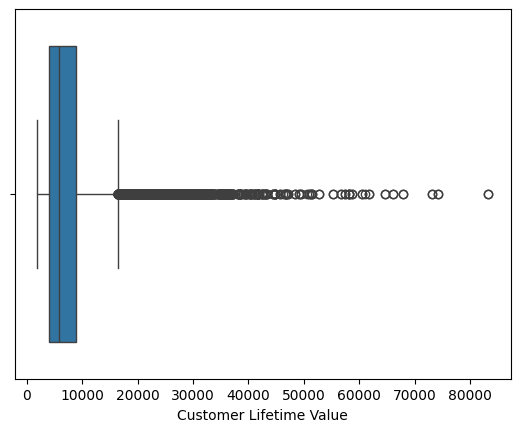

In [144]:
sns.boxplot(x='Customer Lifetime Value', data=merge)
plt.show()

In [145]:
## Analysis of the customers that has high CLV

In [147]:
high_val_flight = merge[merge['Customer Lifetime Value'] > 18000]
high_val_flight.shape

(1270, 18)

In [148]:
high_val_flight.shape[0] / merge.shape[0] * 100

7.514348263416366

- About 7% of the total number of customers have a high CLV

In [149]:
high_val_flight.describe()

,Income,Customer Lifetime Value,year,month,day,cancel_year,cancel_month,tenure,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed
count,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,184.000000,184.000000,184.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000
mean,37692.881890,27120.484591,2018.230709,6.651181,15.589764,2019.293478,6.385870,0.945652,142.796929,35.949134,289657.674409,28960.062323,8718.175827
std,29716.894187,9103.144777,1.949602,3.411896,8.708992,1.335010,3.356425,1.428547,85.496364,24.629802,172747.600667,17271.816079,8922.498714
min,0.000000,18039.110000,2015.000000,1.000000,1.000000,2016.000000,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13663.000000,20967.772500,2017.000000,4.000000,8.000000,2019.000000,3.000000,0.000000,64.000000,15.000000,126817.250000,12679.250000,0.000000
50%,33806.000000,24127.500000,2018.000000,7.000000,16.000000,2019.000000,6.000000,1.000000,163.700000,37.200000,333984.300000,33389.830000,6393.500000
75%,62876.000000,30633.625000,2020.000000,10.000000,23.000000,2020.000000,9.000000,1.000000,206.000000,52.900000,417148.600000,41706.460000,13950.675000
max,99875.000000,83325.380000,2021.000000,12.000000,31.000000,2021.000000,12.000000,5.000000,423.200000,144.400000,934476.300000,93432.530000,43635.100000


In [150]:
184/1270 * 100

14.488188976377952

About 14.50% of the customers that have high CLV have left the program. High customer value is not solely driven by income. High-value customers are frequent travelers covering long distances, making them core revenue drivers.These customers show high retention rates and active reward participation, making them critical for long-term profitability and strategic targeting.

- ---

In [ ]:
# Costomer With Negative tenures 

In [157]:
neg_ten = merge[merge['tenure'] < 0]

In [158]:
neg_ten.describe()

,Income,Customer Lifetime Value,year,month,day,cancel_year,cancel_month,tenure,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,39027.437811,8339.326070,2020.995025,7.184080,15.487562,2018.900498,3.930348,-2.094527,23.532836,6.315423,48858.028856,4884.511343,1240.110945
std,31475.022013,8134.756379,0.070535,2.133294,8.720728,0.565729,2.159890,0.570982,18.821982,6.510078,40458.688825,4045.146058,2487.408521
min,0.000000,2241.110000,2020.000000,3.000000,1.000000,2015.000000,1.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10375.000000,3964.730000,2021.000000,6.000000,8.000000,2019.000000,2.000000,-2.000000,10.000000,1.000000,23387.000000,2338.000000,0.000000
50%,35577.000000,5382.750000,2021.000000,7.000000,16.000000,2019.000000,4.000000,-2.000000,20.900000,5.000000,44158.000000,4414.000000,0.000000
75%,60433.000000,9369.640000,2021.000000,9.000000,23.000000,2019.000000,5.000000,-2.000000,33.000000,9.000000,67406.000000,6739.000000,0.000000
max,99845.000000,58753.880000,2021.000000,11.000000,31.000000,2020.000000,12.000000,-1.000000,119.700000,45.600000,332881.900000,33283.090000,13200.000000


In [160]:
merge[merge['tenure'] == -6]

,Gender,Education,Income,Marital Status,LoyaltyStatus,Customer Lifetime Value,EnrollmentType,year,month,day,cancel_year,cancel_month,tenure,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed
4404,male,College,0.0,Single,Nova,2840.9,2021 Promotion,2021,3,7,2015.0,11.0,-6.0,0.0,0.0,0.0,0.0,0.0


These negative tenure customers can be those who have previously joined the program but has left already and they again want to participate in 2021.

In [165]:
merge.describe()

,Income,Customer Lifetime Value,year,month,day,cancel_year,cancel_month,tenure,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed
count,16901.000000,16901.000000,16901.000000,16901.000000,16901.000000,2288.000000,2288.000000,2288.000000,16901.000000,16901.000000,1.690100e+04,16901.000000,16901.000000
mean,37758.038400,7990.460188,2018.249985,6.665286,15.652979,2019.450175,6.705420,0.971591,142.767694,35.958505,2.901495e+05,29009.236775,8590.815561
std,30368.992499,6863.173093,1.979821,3.400013,8.784177,1.338005,3.466717,1.547831,83.600190,24.156479,1.702178e+05,17018.915226,8805.602219
min,0.000000,1898.010000,2015.000000,1.000000,1.000000,2015.000000,1.000000,-6.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,3979.720000,2017.000000,4.000000,8.000000,2019.000000,4.000000,0.000000,70.100000,16.000000,1.436100e+05,14358.000000,0.000000
50%,34161.000000,5780.180000,2018.000000,7.000000,16.000000,2020.000000,7.000000,1.000000,163.100000,36.800000,3.318114e+05,33173.630000,6534.100000
75%,62396.000000,8945.690000,2020.000000,10.000000,23.000000,2021.000000,10.000000,1.000000,204.100000,52.900000,4.147163e+05,41464.240000,13649.900000
max,99981.000000,83325.380000,2021.000000,12.000000,31.000000,2021.000000,12.000000,5.000000,539.400000,144.700000,1.059681e+06,105951.600000,57527.800000


Since the maximum tenure for most customers is around one year, this indicates that customer churn occurs predominantly in the early stages of the customer lifecycle. The loyalty program struggles with long-term retention rather than acquisition.Since the maximum tenure for most customers is around one year, this indicates that customer churn occurs predominantly in the early stages of the customer lifecycle. The loyalty program struggles with long-term retention rather than acquisition.

In [166]:
income_zero = merge[merge['Income'] == 0]

In [167]:
income_zero.shape

(4273, 18)

In [168]:
income_zero.shape[0] / merge.shape[0] * 100

25.28252766108514

About 25.28% of the data has zero income 

In [169]:
income_zero.describe()

,Income,Customer Lifetime Value,year,month,day,cancel_year,cancel_month,tenure,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed
count,4273.0,4273.000000,4273.000000,4273.000000,4273.000000,581.000000,581.000000,581.000000,4273.000000,4273.000000,4.273000e+03,4273.000000,4273.000000
mean,0.0,7585.778252,2018.273344,6.667213,15.854201,2019.500861,6.678141,0.987952,143.743646,36.274210,2.905314e+05,29047.397379,8796.660473
std,0.0,6557.048932,1.962830,3.438150,8.725020,1.351404,3.338597,1.608660,83.139736,23.907312,1.675816e+05,16755.312922,9037.684433
min,0.0,1898.010000,2015.000000,1.000000,1.000000,2015.000000,1.000000,-6.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.0,3744.580000,2017.000000,4.000000,8.000000,2019.000000,4.000000,0.000000,74.000000,17.000000,1.469950e+05,14695.000000,0.000000
50%,0.0,5568.950000,2018.000000,7.000000,16.000000,2020.000000,7.000000,1.000000,162.600000,37.000000,3.314927e+05,33140.070000,6612.000000
75%,0.0,8500.120000,2020.000000,10.000000,23.000000,2021.000000,9.000000,1.000000,204.200000,53.100000,4.131876e+05,41309.660000,14006.400000
max,0.0,74228.520000,2021.000000,12.000000,31.000000,2021.000000,12.000000,5.000000,488.700000,141.500000,1.051448e+06,105127.900000,57527.800000


In [171]:
income_zero.describe(include='object')

,Gender,Education,Marital Status,LoyaltyStatus,EnrollmentType
count,4273,4273,4273,4273,4273
unique,2,1,3,3,2
top,male,College,Single,Star,Standard
freq,2172,4273,2449,2133,3986


- Zero-income customers are predominantly college-educated, mostly single, evenly split by gender, and largely enrolled through standard programs. Despite missing income data, they exhibit high loyalty status and strong engagement, indicating that income is not a reliable indicator of customer value in this segment.

---

In [ ]:
# Lets check the ones that travel frequent

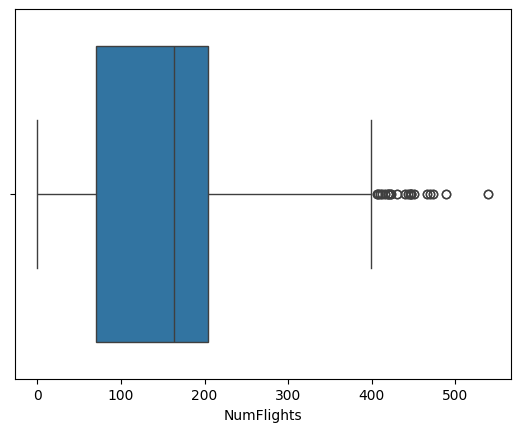

In [172]:
sns.boxplot(x='NumFlights', data=merge)
plt.show()

In [175]:
high_traveller = merge[merge['NumFlights'] > 400]

In [176]:
high_traveller.shape

(42, 18)

In [178]:
high_traveller.shape[0] / merge.shape[0] * 100

0.24850600556180108

- About 0.25% of the population travel more than 400 times in 3 year time span

In [179]:
high_traveller.describe()

,Income,Customer Lifetime Value,year,month,day,cancel_year,cancel_month,tenure,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed
count,42.000000,42.000000,42.000000,42.000000,42.000000,0.0,0.0,0.0,42.000000,42.000000,4.200000e+01,42.000000,42.000000
mean,36046.238095,6658.432619,2016.904762,6.428571,13.285714,NaN,NaN,NaN,441.747619,106.880952,8.554357e+05,85527.953333,21260.100000
std,35632.160801,5055.718586,1.805270,3.372362,9.229554,NaN,NaN,NaN,32.087557,19.542739,1.065126e+05,10651.123152,13059.515969
min,0.000000,2370.620000,2015.000000,1.000000,1.000000,NaN,NaN,NaN,406.700000,77.600000,6.756755e+05,67550.150000,2626.000000
25%,0.000000,4051.632500,2015.000000,4.000000,5.250000,NaN,NaN,NaN,419.100000,93.100000,7.970645e+05,79692.450000,10096.600000
50%,26243.500000,4896.710000,2016.000000,6.000000,13.000000,NaN,NaN,NaN,439.900000,104.300000,8.605602e+05,86042.620000,21585.900000
75%,61386.750000,7569.152500,2018.750000,9.000000,19.500000,NaN,NaN,NaN,450.400000,123.600000,9.301961e+05,93003.210000,26396.000000
max,98784.000000,31269.270000,2020.000000,12.000000,31.000000,NaN,NaN,NaN,539.400000,144.700000,1.059681e+06,105951.600000,46337.900000


In [180]:
high_traveller.describe(include='object')

,Gender,Education,Marital Status,LoyaltyStatus,EnrollmentType
count,42,42,42,42,42
unique,2,5,3,3,1
top,male,Bachelor,Married,Nova,Standard
freq,25,23,21,17,42


This group represents an elite segment of high-frequency travelers with exceptionally large flight counts, travel distances, and loyalty point accumulation. Despite moderate average income and customer lifetime value, these customers demonstrate zero observed churn and sustained engagement, suggesting corporate or professional travel patterns where usage is high but margins may be lower. Their strategic importance lies in volume stability and network utilization rather than direct profitability.

---

In [181]:
## People that cancelled their subscription in 2021
cancel_2021 = merge[merge['cancel_year'] == 2021]
cancel_2021.shape

(649, 18)

In [182]:
cancel_2021.shape[0] / merge.shape[0] * 100

3.8400094668954496

About 4% of the customers cancelled their subscription in 2021

In [184]:
cancel_2021.describe()

,Income,Customer Lifetime Value,year,month,day,cancel_year,cancel_month,tenure,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.0,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,37385.644068,7886.597242,2019.349769,6.400616,15.956857,2021.0,6.907550,1.650231,100.197535,25.111556,198282.996764,19824.491664,5837.125270
std,30907.009207,6913.826130,1.578991,3.510531,8.854516,0.0,3.531265,1.578991,65.109450,18.959121,126374.705296,12635.647241,7162.786935
min,0.000000,1898.680000,2016.000000,1.000000,1.000000,2021.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3933.810000,2018.000000,3.000000,8.000000,2021.0,4.000000,1.000000,46.800000,10.500000,97303.000000,9728.000000,0.000000
50%,33555.000000,5754.750000,2020.000000,6.000000,16.000000,2021.0,7.000000,1.000000,76.000000,20.900000,154091.400000,15406.040000,4113.000000
75%,60969.000000,8888.880000,2020.000000,10.000000,24.000000,2021.0,10.000000,3.000000,153.500000,36.100000,293981.500000,29392.350000,9211.300000
max,99069.000000,83325.380000,2021.000000,12.000000,31.000000,2021.0,12.000000,5.000000,316.900000,102.800000,764356.200000,76425.720000,44462.300000


In [188]:
merge.to_csv('../data/merge.csv', index=False)